In [152]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

from connectivity import constants as const
from connectivity import visualize_summary as summary

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [172]:
# run connectivity routine
# train and validate ridge model(s)
# evaluate best model (based on CV R)

# navigate to scripts dir
dirs = const.Dirs()
os.chdir(os.path.join(Path(dirs.base_dir).parent, 'connectivity/scripts'))

%run -i 'script_mk.py' --cortex="tesselsWB642" --model_type="WTA"

<Figure size 1080x720 with 0 Axes>

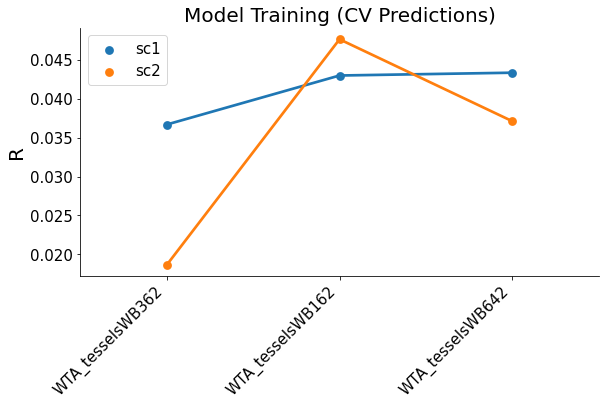

In [190]:
# plot alpha curve for train CVs

df = summary.train_summary()

summary.plot_train_predictions(dataframe=df, hue='train_exp');


best model for sc1 is ridge_tesselsWB642_alpha_8
best model for sc2 is ridge_tesselsWB642_alpha_4


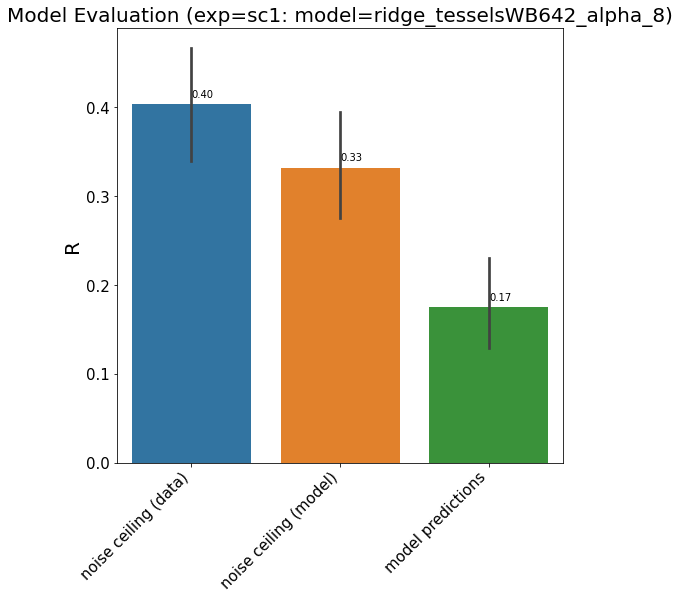

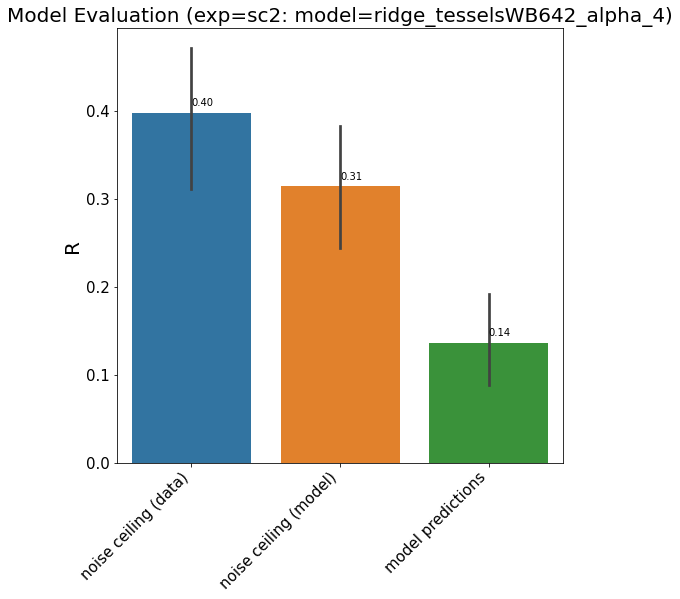

In [133]:
# Model evaluation (noise ceiling and predictions)

# get evaluation 
df_eval = summary.eval_summary()

for exp in ['sc1', 'sc2']:
    
    #plot evaluation
    summary.plot_eval_predictions(dataframe=df_eval, exp=exp)



In [156]:
# visualize voxel maps
view = summary.plot_map(gifti_func='group_R_vox', exp='sc1', cscale=[0,.3])
view

best model for sc1 is ridge_tesselsWB642_alpha_8
